# Dynamics via acceleration maps

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from analysis import analysis

from importlib import reload

L_box = 50
mu_factor = 6  # conversion to microns
min_factor = 8  # conversion to minutes


#### Load grid by grid
- Load `fulltake_gid*.pkl`, which is all of the runs for a config

In [129]:
from glob import glob

files = glob("../_server/sim_data/corners_only_2/fulltake_gid[0-9].pkl")
files_2 = glob("../_server/sim_data/corners_only_2/fulltake_gid[1][0-6].pkl")
files.extend(files_2)

data = []

for file in files:
    df = pd.read_pickle(file)
    # df = df.iloc[::2]
    df.x *= mu_factor
    df.y *= mu_factor
    data.append(df)

print(f"Loaded {len(data)} configurations.")
[
    print(
        f"\t - Grid {df.gid.iloc[0]}: {len(df)} total data points | {len(df.rid.unique())} runs | {len(df[df.rid==0])} data points / run"
    )
    for df in data
]
display(data[0])


Loaded 17 configurations.
	 - Grid 2: 344771 total data points | 720 runs | 477 data points / run
	 - Grid 4: 460800 total data points | 960 runs | 480 data points / run
	 - Grid 1: 367744 total data points | 768 runs | 480 data points / run
	 - Grid 7: 389815 total data points | 819 runs | 0 data points / run
	 - Grid 3: 339368 total data points | 713 runs | 479 data points / run
	 - Grid 0: 365503 total data points | 768 runs | 475 data points / run
	 - Grid 5: 460800 total data points | 960 runs | 480 data points / run
	 - Grid 8: 345064 total data points | 720 runs | 480 data points / run
	 - Grid 6: 439252 total data points | 924 runs | 470 data points / run
	 - Grid 9: 345570 total data points | 720 runs | 480 data points / run
	 - Grid 10: 342373 total data points | 720 runs | 478 data points / run
	 - Grid 12: 437760 total data points | 912 runs | 480 data points / run
	 - Grid 14: 425560 total data points | 893 runs | 476 data points / run
	 - Grid 13: 437760 total data points

,x,y,vx,vy,time[hr],gamma,R_eq,mag_std,add_rate,gid,rid
0,186.500000,150.000000,0.000000,0.000000,0.00,1.8,2.5,15000.0,3.0,2,460
1,185.833532,149.974656,-0.349477,-0.127765,0.05,1.8,2.5,15000.0,3.0,2,460
2,184.581327,149.879412,-0.774589,-0.232240,0.10,1.8,2.5,15000.0,3.0,2,460
3,184.456697,150.471281,0.253945,-0.023403,0.15,1.8,2.5,15000.0,3.0,2,460
4,184.948253,150.542755,-0.119703,0.088581,0.20,1.8,2.5,15000.0,3.0,2,460
...,...,...,...,...,...,...,...,...,...,...,...
472,118.877508,150.632136,-0.590925,-0.334361,23.75,1.8,2.5,15000.0,3.0,2,292
473,118.488342,150.248106,-0.671410,0.157254,23.80,1.8,2.5,15000.0,3.0,2,292
474,119.950041,150.280315,0.308329,-0.052177,23.85,1.8,2.5,15000.0,3.0,2,292
475,119.461351,150.211294,-0.201631,0.176079,23.90,1.8,2.5,15000.0,3.0,2,292


#### Calculate $\{v, a\}$ and bin $\{x, v, a\}$
- `global_x_v_a`: `list`, with each element being a `pd.DataFrame` for an entire grid parameter. The data frame contains the position and speed for all the runs. 

In [161]:
global_x_v_a = []

for df_gid in data:

    if not df_gid.iloc[0].gid.astype(int) == 8:
        continue 
        
    # x, v, a values for this entire config
    grid_x_v_a = []

    # compute speed and acc for each run
    for rid, df_rid in df_gid.groupby("rid"):
        x_v_a = analysis.calc_v_a_from_position(df_rid.x, df_rid["time[hr]"])
        x_v_a[df_gid.iloc[0][5:].index] = df_gid.iloc[0][5:]
        grid_x_v_a.append(x_v_a)

    grid_x_v_a = pd.concat(grid_x_v_a)

    # with a 112mu mp, this gives bins of dim 3.5mu x 3.5mu
    nbins = 18
    analysis.get_bin_indices(grid_x_v_a, nbins)

    global_x_v_a.append(grid_x_v_a)

# global_x_v_a = pd.concat(global_x_v_a)
global_x_v_a[0]


,x,v,a,gamma,R_eq,mag_std,add_rate,gid,rid,x_bin,v_bin
0,113.500000,15.987251,488.199681,0.8,3.0,15000.0,3.0,8.0,460.0,0,10
1,114.299363,40.397235,-294.168875,0.8,3.0,15000.0,3.0,8.0,460.0,0,11
2,116.319224,25.688792,-171.867171,0.8,3.0,15000.0,3.0,8.0,460.0,1,10
3,117.603664,17.095433,224.712789,0.8,3.0,15000.0,3.0,8.0,460.0,1,10
4,118.458436,28.331072,-403.410309,0.8,3.0,15000.0,3.0,8.0,460.0,1,10
...,...,...,...,...,...,...,...,...,...,...,...
473,147.187837,63.041372,-317.732976,0.8,3.0,15000.0,3.0,8.0,460.0,8,12
474,150.339905,47.154723,155.657839,0.8,3.0,15000.0,3.0,8.0,460.0,9,11
475,152.697642,54.937615,978.628417,0.8,3.0,15000.0,3.0,8.0,460.0,9,12
476,155.444522,103.869036,112.850177,0.8,3.0,15000.0,3.0,8.0,460.0,10,14


#### Acceleration maps and flow lines

- Consider each grid's behavior aggregated across all its runs.

In [78]:
def _make_title(df):
    tbl = {
        "gamma": r"$\gamma$",
        "R_eq": r"$R_{eq}$",
        "mag_std": r"$\sigma_{MVG}$",
        "add_rate": r"$\tau_{MVG}$",
        "gid": "ID",
    }
    d = dict(df.iloc[0][3:8])
    title = ""
    for key, val in d.items():
        title += tbl[key] + " = " + f"{val}" + "\n"
    return title


In [152]:
reload(analysis)

<module 'analysis.analysis' from '/scratch4/bcamley1/hopper/analysis/analysis.py'>

In [80]:
import yaml

def _get_mp_type(yfile):
    with open(yfile) as f:
        return yaml.safe_load(f)["substrate"]["kind"]

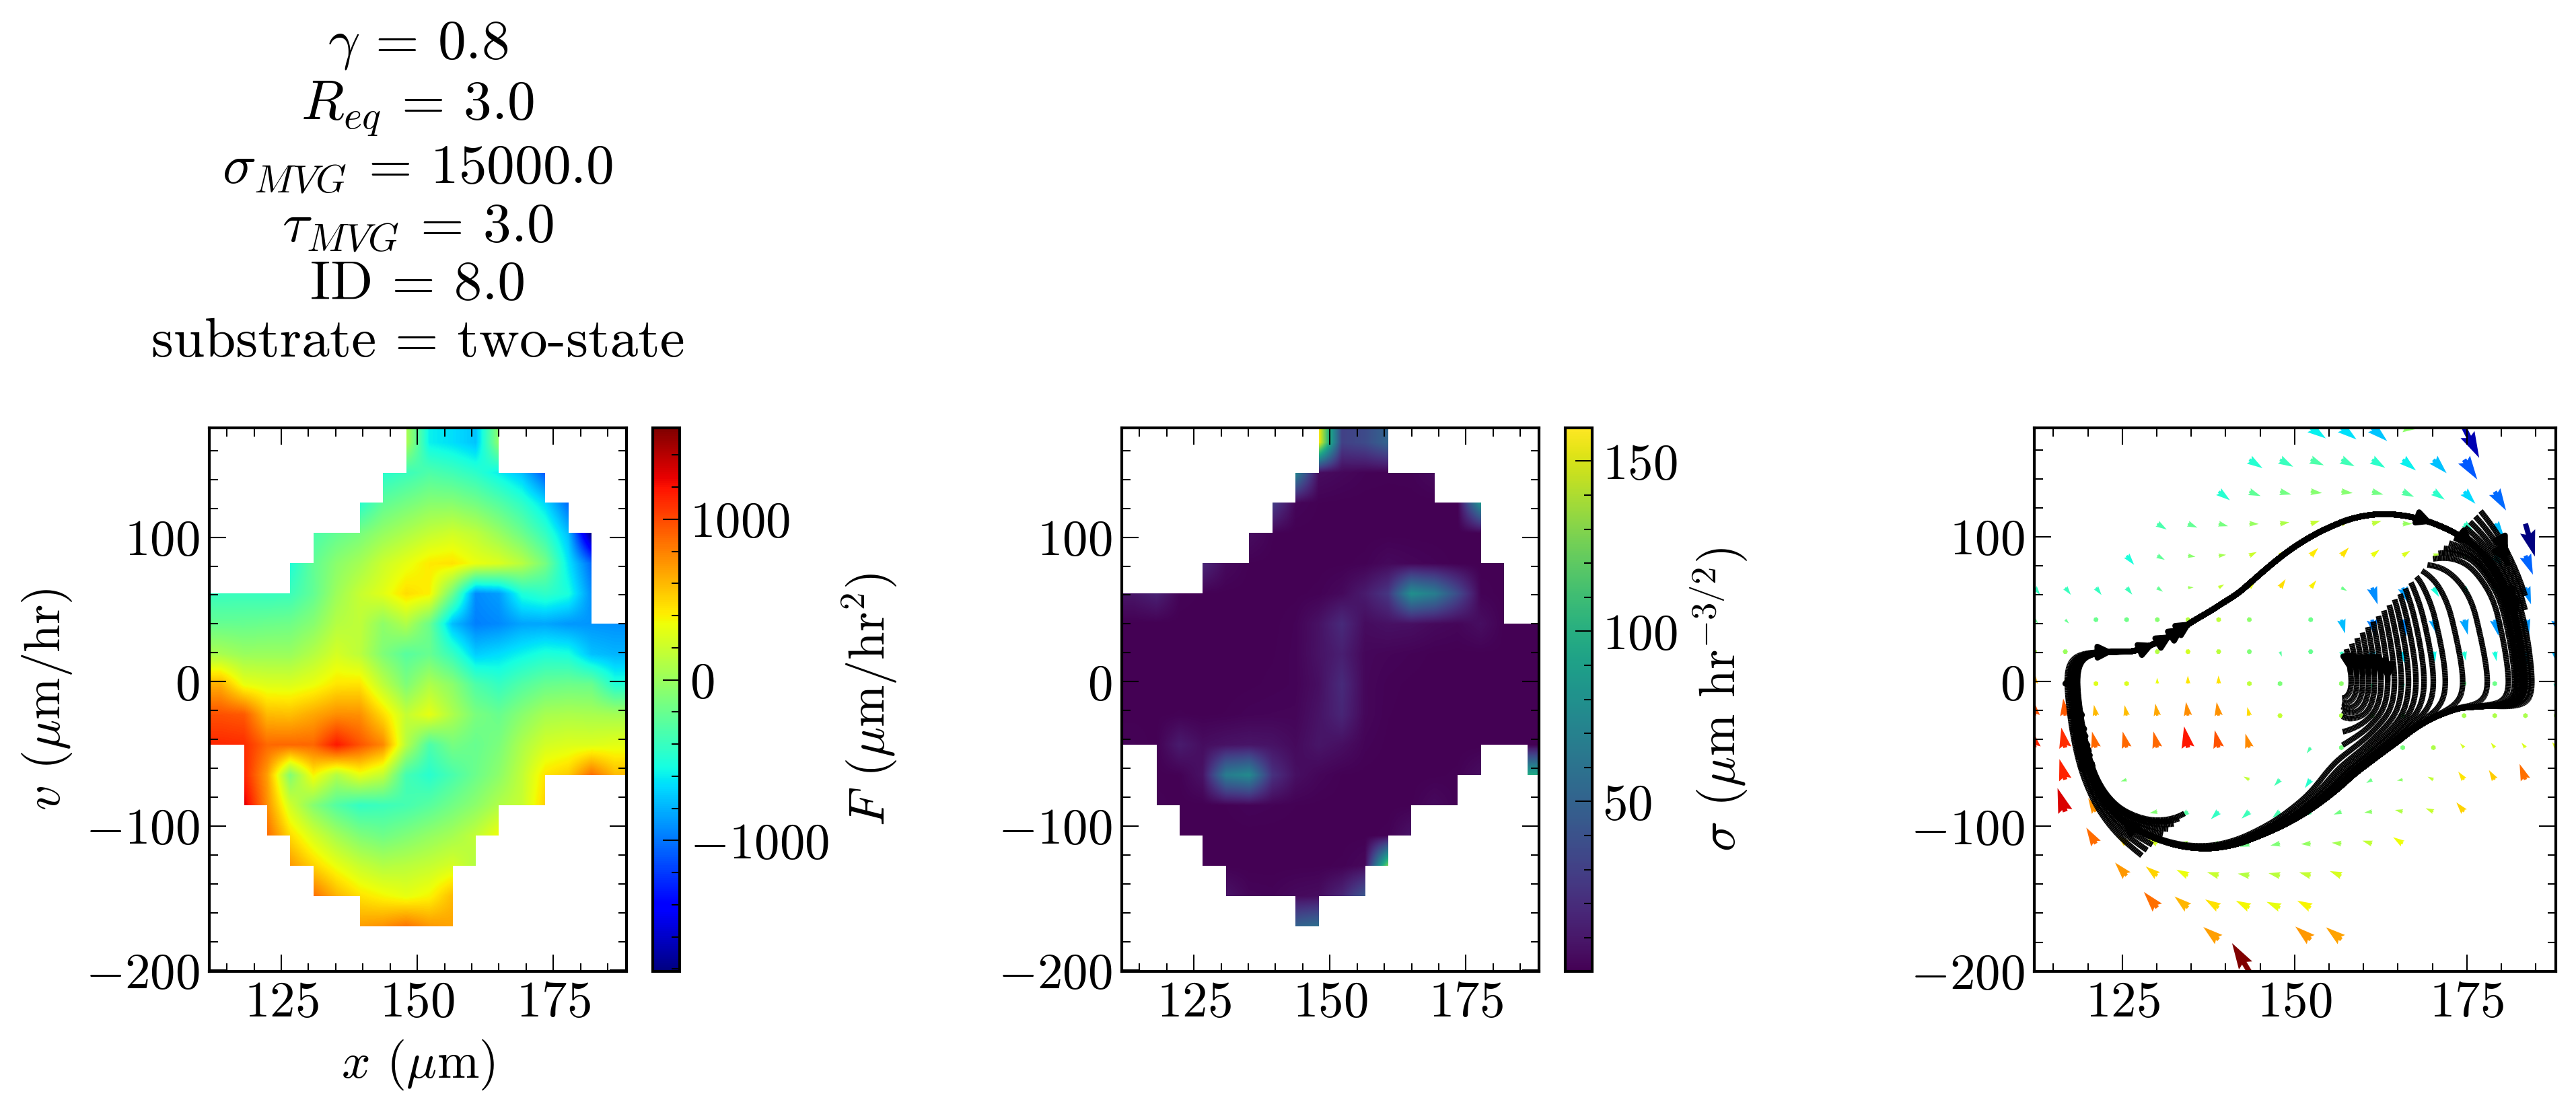

In [164]:
gid_to_indx = dict((global_x_v_a[k].iloc[0].gid.astype(int), k) for k in range(len(global_x_v_a)))

dt = 0.0015 * 250 * 8 / 60  # hr

gids = [8]
# gids = np.arange(29, 32)
for gid in gids:
    df_gid = global_x_v_a[gid_to_indx[gid]]
    F, F_std, sigma = analysis.calc_F_sigma(df_gid, dt, nbins, min_pts=1)

    bounds = df_gid.agg(["min", "max"])
    xmin, xmax = bounds["x"]
    vmin, vmax = bounds["v"]

    plot_title = _make_title(df_gid)
    mp_type = _get_mp_type(f"../configs/IM/grid_id{gid}/simbox.yaml")
    plot_title += f"substrate = {mp_type}"
    bounds = (xmin, xmax, vmin, vmax, nbins)
    title = {"title": plot_title, "size": 20}

    analysis.imshow_F_sigma([F, F_std], bounds, title, interp="bilinear", err_cutoff=5
                            # save_path=f"grid_{gid}.png")
                           )


(array([485., 103.,  17.,  16.,   5.,  14.,   4.,   1.,   2.,   1.]),
 array([1.000e+00, 6.620e+02, 1.323e+03, 1.984e+03, 2.645e+03, 3.306e+03,
        3.967e+03, 4.628e+03, 5.289e+03, 5.950e+03, 6.611e+03]),
 <BarContainer object of 10 artists>)

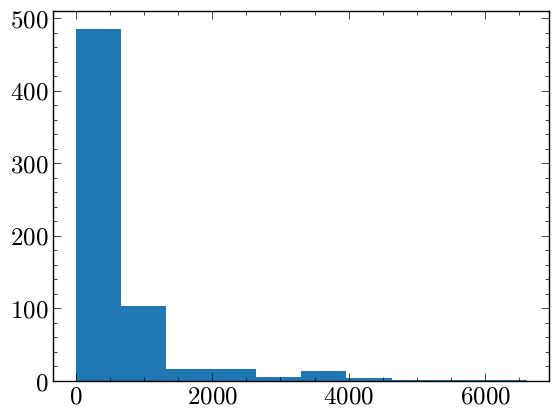

In [146]:
plt.hist(global_x_v_a[0].groupby(["x_bin", "v_bin"]).size().values)

In [84]:
from IPython.display import Video

Video(f"mov_0_{gid}.mp4")

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')

- I think the shoot ups near the middle of the two-state micropattern are due to the tension term causing sling-shot behavior

- Another culprit -- filopodia probability causing faster negative/positive $F$

- Probabilities quickly turn from basin to basin, placing MVGs. This could explain the sudden change in $F$ in near the bridge.

- Our simulated cells now look like the experiments -- elongated while hopping. BUT, we're looking at cell centroid while experiment looks at nuclues, which significantly lags. I think this explains the high RED and BLUE lining of the phase-space, near the bridge. The centroid is in the bridge while experiencing forces. The nucleus would be farther back. 

#### Position dist

In [ ]:
reload(analysis)

plt.rc("axes", titlesize=8)
analysis.position_dist(data, "two_state", mu_factor)


#### Hopping times

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(8, 6), dpi=200)
plt.rc("axes", titlesize=12)

x, y = np.meshgrid([0, 1, 2], [0, 1, 2])

# in microns
d = 73 / 2
xL = (L_box / 2) * 6 - d
xR = (L_box / 2) * 6 + d
buffer = 38 / 2

for i, j, df in zip(x.flatten(), y.flatten(), data):
    beta = df.beta.iloc[0]
    gamma = df.gamma.iloc[0]
    D = df.D.iloc[0]
    axs[i, j].set_title(rf"$\beta$ = {beta}, $\gamma$ = {gamma}, $D$ = {D}", y=1.1)

    hop_times = []
    for rid, d in df.groupby("rid"):
        for t in analysis.get_hopping_times(d, xL, xR, buffer):
            hop_times.append(t)

    if len(hop_times) == 0:
        continue

    axs[i, j].hist(hop_times, color="red", alpha=0.5, density=True)
    axs[i, j].set_xlabel("Hopping time (hr)", fontsize=14)

plt.tight_layout()
plt.subplots_adjust(hspace=2, wspace=2)
plt.show()
